In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('archive (1)\Arabic Sentiment Analysis Dataset - SS2030.csv')
df.head()

,text,Sentiment
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,1
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,1
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,1
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,1
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4252 non-null   object
 1   Sentiment  4252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.6+ KB


In [4]:
df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [5]:
df['Sentiment'].value_counts()

Sentiment
1    2436
0    1816
Name: count, dtype: int64

In [6]:
df.sample(10)

,text,Sentiment
1769,#الملك_يدشن_مشاريع_القصيم\n \n الكثير من المشا...,1
1535,@9m_____t تعدد الزوجات تعفس أم الحياة كلها وتغ...,0
466,المرأه السعودية نصف المجتمع المفروض بمناسبة ال...,1
4225,#غرد_بحبك_لمحمد_بن_سلمان\n \n الله يديمه ويحفظ...,1
4240,#غرد_بحبك_لمحمد_بن_سلمان المُستقبل الأفضل ❤️,1
3067,يارب الوظيفة 🤲🏻 #عطاله_التخصصات_الصحيه١,0
2253,RT @EmyyOtb: #سعوديات_نطلب_اسقاط_الولايه851\n ...,1
250,دراسة حديثة 🔴\n \n تعدد الزوجات خطر على قلب ال...,0
1503,@Ra_felt @IslamQAcom إذا تعدى عمر المرأة ثلاثي...,1
2107,خلصنا من اسقاط الولايه جاتنا العباية المقلوبه ...,0


In [7]:
df['text'][1000]

'@nampsycho أنا حضريه متحضره متحرره مع قياده المرأه'

In [8]:
import emoji

def remove_english_char(df):
    
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+|"
        r"[A-Za-z.@:()\n/_0-9]", flags=re.UNICODE)

    df['text'] = df['text'].apply(lambda x: emoji_pattern.sub(r'', str(x)))
    return df


clean_df = remove_english_char(df)
    

In [9]:
clean_df.head()

,text,Sentiment
0,حقوق المرأة,1
1,حقوق المرأة في الإسلام,1
2,لجنة التنمية بشبرا ما زال التسجيل مستمر ف...,1
3,حقوق المرأة التي تضمنها لها وزارة العدل,1
4,ولي امر الزوجة او ولي الزوجة او ولي المراة م...,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectroizer = TfidfVectorizer()
X = vectroizer.fit_transform(clean_df['text'])
vectroizer.get_feature_names_out()

array(['آااهه', 'آبار', 'آبتس', ..., '٩٩', 'گله', 'گلهم'], dtype=object)

In [11]:
y = clean_df['Sentiment']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
X_train

<3401x24512 sparse matrix of type '<class 'numpy.float64'>'
	with 67054 stored elements in Compressed Sparse Row format>

In [14]:
y_train

962     0
1601    0
2070    0
2248    1
882     0
       ..
1033    1
3264    0
1653    1
2607    0
2732    1
Name: Sentiment, Length: 3401, dtype: int64

In [15]:
gnb = GaussianNB()

In [16]:
X_train=X_train.toarray()
gnb.fit(X_train,y_train)

GaussianNB()

In [17]:
X_test = X_test.toarray()


In [18]:
y_pred=gnb.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred=y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.7708578143360753


# Inference Pipe line

In [47]:
import emoji

def remove_english_char(df):
    
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+|"
        r"[A-Za-z.@:()\n/_0-9]", flags=re.UNICODE)
    print(f"Text after transforming {df}")
    return df


txt = remove_english_char('حمد قطوة')

Text after transforming حمد قطوة


In [48]:
lst_infer = [txt]
lst_infer_transformed = vectroizer.transform(lst_infer)
lst_pred = gnb.predict(lst_infer_transformed.toarray())


In [49]:
print(lst_infer)
print(lst_pred)

['حمد قطوة']
[1]


In [61]:
gnb.theta_[1:]

array([[1.27192354e-04, 8.21386089e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [63]:
feature_names = vectroizer.get_feature_names_out()
mean = gnb.theta_

In [73]:
import pandas as pd

means_df = pd.DataFrame(mean, columns=feature_names)
means_df.head()

,آااهه,آبار,آبتس,آت,آثم,آثناء,آجل,آخر,آخرتها,آخره,...,٦٠٠٠,٧سنين,٧٠,٧٠٠,٨٠,٨٠٠,٨١٠,٩٩,گله,گلهم
0,0.000000,0.000000,0.000129,0.000000,0.000000,0.0,0.000292,0.000753,0.000136,0.000000,...,0.000146,0.000127,0.000588,0.000127,0.000496,0.000121,0.000000,0.000141,0.000121,0.000121
1,0.000127,0.000082,0.000000,0.000107,0.000417,0.0,0.000000,0.000553,0.000000,0.000096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000096,0.000142,0.000000,0.000000,0.000000


In [69]:

word_to_search = 'حمد'  

if word_to_search in means_df.columns:
    word_probabilities = means_df[word_to_search]
    
    print(f"Mean values for '{word_to_search}':")
    print(word_probabilities)


Mean values for 'حمد':
0    0.000000
1    0.000164
Name: حمد, dtype: float64


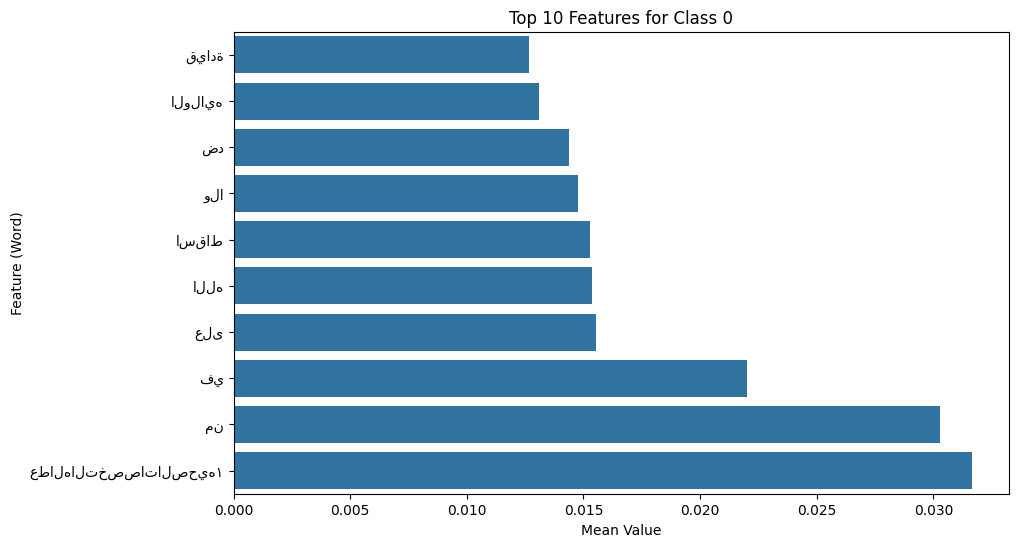

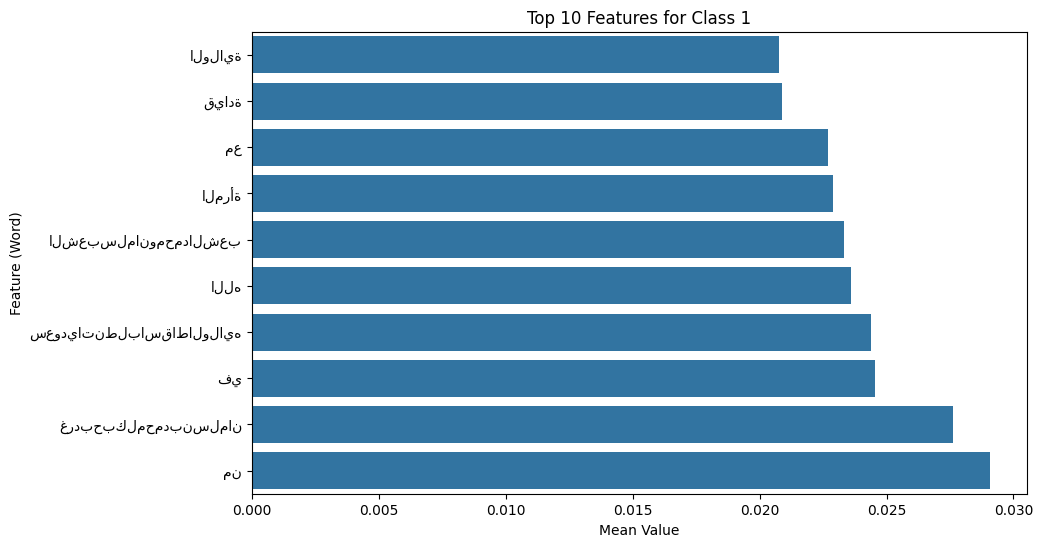

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10
for class_index in range(means_df.shape[0]):
    plt.figure(figsize=(10, 6))
    sorted_indices = means_df.iloc[class_index].argsort()[-top_n:]
    top_features = means_df.columns[sorted_indices]
    top_means = means_df.iloc[class_index, sorted_indices]
    
    sns.barplot(x=top_means, y=top_features)
    plt.title(f'Top {top_n} Features for Class {class_index}')
    plt.xlabel('Mean Value')
    plt.ylabel('Feature (Word)')
    plt.show()
